<a href="https://colab.research.google.com/github/shekar9801/Deep-Learning-with-Pytorch/blob/main/simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class Model(nn.Module):
  def __init__(self, in_feature=4, h1=8, h2=9, out_feature=3):
    super().__init__()
    self.fc1 = nn.Linear(in_feature, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_feature)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [ ]:
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
data = pd.read_csv(url)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
data['species'] = data['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('species', axis=1).values
y = data['species'].values

# X = X.values
# y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
torch.manual_seed(33)
model = Model()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epoch: 0 Loss: 1.1880278587341309
Epoch: 10 Loss: 1.0545216798782349
Epoch: 20 Loss: 0.9283751845359802
Epoch: 30 Loss: 0.656653106212616
Epoch: 40 Loss: 0.4490240514278412
Epoch: 50 Loss: 0.32752886414527893
Epoch: 60 Loss: 0.21238765120506287
Epoch: 70 Loss: 0.12857428193092346
Epoch: 80 Loss: 0.08929704129695892
Epoch: 90 Loss: 0.07297828793525696


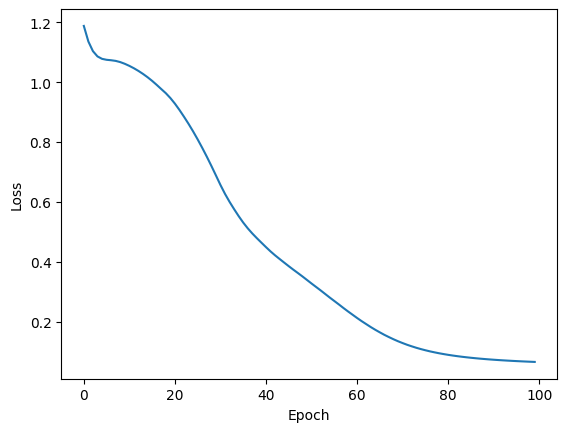

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    loss = criterion(y_val, y_test[i])
    y_val = y_val.argmax().item()

    if y_test[i]==0:
      x = 'setosa'
    elif y_test[i]==1:
      x = 'versicolor'
    else:
      x = 'virginica'

    print(f'{i+1:2}. predicted {str(y_val):2} actual {y_test[i]:2} {x}')


 1. predicted 1  actual  1 versicolor
 2. predicted 1  actual  1 versicolor
 3. predicted 0  actual  0 setosa
 4. predicted 1  actual  1 versicolor
 5. predicted 2  actual  2 virginica
 6. predicted 2  actual  2 virginica
 7. predicted 0  actual  0 setosa
 8. predicted 0  actual  0 setosa
 9. predicted 2  actual  2 virginica
10. predicted 2  actual  2 virginica
11. predicted 2  actual  2 virginica
12. predicted 0  actual  0 setosa
13. predicted 2  actual  2 virginica
14. predicted 1  actual  1 versicolor
15. predicted 2  actual  2 virginica
16. predicted 1  actual  1 versicolor
17. predicted 1  actual  2 virginica
18. predicted 0  actual  0 setosa
19. predicted 1  actual  1 versicolor
20. predicted 2  actual  2 virginica
21. predicted 0  actual  0 setosa
22. predicted 0  actual  0 setosa
23. predicted 2  actual  2 virginica
24. predicted 0  actual  0 setosa
25. predicted 2  actual  2 virginica
26. predicted 2  actual  2 virginica
27. predicted 1  actual  1 versicolor
28. predicted 1  a

Model(
  (layer1): Linear(in_features=4, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=9, bias=True)
  (layer3): Linear(in_features=9, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
 0 loss 1.1047 accuracy 0.33%
 5 loss 1.0667 accuracy 0.68%
10 loss 0.9791 accuracy 0.68%
15 loss 0.8245 accuracy 0.68%
20 loss 0.6349 accuracy 0.68%
25 loss 0.5136 accuracy 0.68%
30 loss 0.4493 accuracy 0.69%
35 loss 0.3769 accuracy 0.87%
40 loss 0.2852 accuracy 0.96%
45 loss 0.2157 accuracy 0.97%
50 loss 0.1536 accuracy 0.97%
55 loss 0.1083 accuracy 0.98

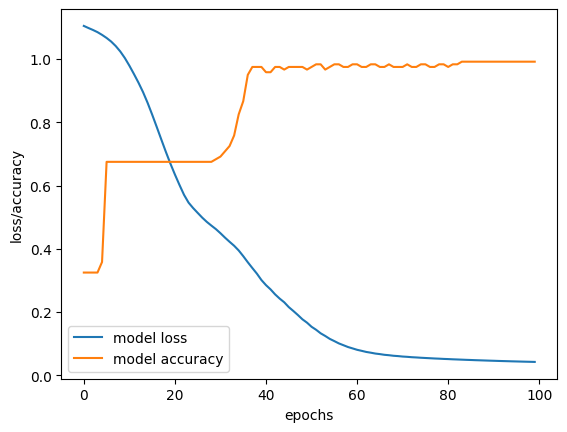

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


class Model(nn.Module):
    def __init__(self, in_feature=4, hidden1=8, hidden2=9, hidden3=10,  out_feature=3):
        super().__init__()
        self.layer1 = nn.Linear(in_feature, hidden1)
        self.layer2 = nn.Linear(hidden1, hidden2)
        self.layer3 = nn.Linear(hidden2, hidden3)
        self.out = nn.Linear(hidden3, out_feature)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.out(x)
        return x


torch.manual_seed(20)
model = Model()
print(model)

url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
data = pd.read_csv(url)

data['species'] = pd.Categorical(data['species']).codes
print(data.head())


X = data.drop('species', axis=1).values
y = data['species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


epcohs = 100
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
losses = []
model_accuracy = []

for epoch in range(epcohs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    predicted_classes = torch.argmax(y_pred, dim=1).detach().cpu().numpy()
    true_labels = y_train.detach().cpu().numpy()
    accuracy = accuracy_score(predicted_classes, true_labels)
    model_accuracy.append(accuracy)
    losses.append(loss.detach().cpu().numpy())

    if epoch % 5 == 0:
        print(f'{epoch:2} loss {loss:.4f} accuracy {accuracy:.2f}%')

print(len(losses))
print(len(model_accuracy))


plt.plot(losses, label = 'model loss')
plt.plot(model_accuracy, label='model accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.show()